# London Bike Sharing
Our goal is to predict how many bikes will be used.

The data is as follows:

"timestamp" - timestamp field for grouping the data

"cnt" - the count of a new bike shares

"t1" - real temperature in C

"t2" - temperature in C "feels like"

"hum" - humidity in percentage

"windspeed" - wind speed in km/h

"weathercode" - category of the weather

"isholiday" - boolean field - 1 holiday / 0 non holiday

"isweekend" - boolean field - 1 if the day is weekend

"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

# Import Necessary Libraries

In [13]:
# !pip install pandas-profiling
!conda env create -n pandas-profiling


SpecNotFound: Invalid name 'pandas-profiling', try the format: user/package



In [14]:
# General Libraries
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport

# Modelling Libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor


# Data Wrangling
Gather data, Assess data and Clean data 

## Gather Data

In [15]:
# Import data
bikes = pd.read_csv('london_merged.csv')

In [16]:
# View data
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


## Assess Data

In [17]:
# Check info
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


No missing values

In [18]:
# To confirm no missing values
bikes.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [19]:
# Check description of data
bikes.describe(include='all')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
unique,17414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-03-21 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,NaN,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,NaN,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,NaN,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,NaN,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000


No outliers in our data

In [20]:
# Check for duplicates
bikes.duplicated().sum()

0

No duplicates

<AxesSubplot:>

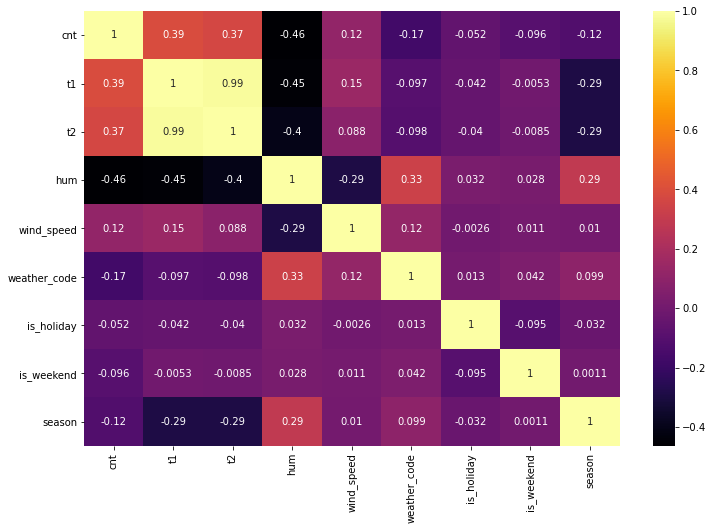

In [21]:
# Check for correlation

## Create corr matrix
corr_matrix = bikes.corr()

## Visualize it
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

t1 and t2 are highly correlated

In [10]:
# Visualize using pandas profiling
## Create reporter
# Pandas profiling offers report generation for the dataset with lots of features and customizations for the report generated
report = ProfileReport(bikes)

## Generate report
report.to_widgets()

Generate report structure: 100%|██████████| 1/1 [00:07<00:00,  7.42s/it]


## Clean Data

In [23]:
# Dealing with correlated features
bikes = bikes.drop('t1', axis=1)

In [24]:
# Dealing with wrong data type
bikes['timestamp'] = pd.to_datetime(bikes['timestamp'])

In [25]:
# Test
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t2            17414 non-null  float64       
 3   hum           17414 non-null  float64       
 4   wind_speed    17414 non-null  float64       
 5   weather_code  17414 non-null  float64       
 6   is_holiday    17414 non-null  float64       
 7   is_weekend    17414 non-null  float64       
 8   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 1.2 MB


# Feature Engineering

In [27]:
# Extract Hr from time stamp
bikes['hour'] = bikes['timestamp'].dt.hour
# bikes['hour']

In [18]:
# Extract day of the week
bikes['day_of_week'] = bikes['timestamp'].dt.day_of_week

In [19]:
bikes.head()

,timestamp,cnt,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week
0,2015-01-04 00:00:00,182,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6
1,2015-01-04 01:00:00,138,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6
2,2015-01-04 02:00:00,134,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6
3,2015-01-04 03:00:00,72,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6
4,2015-01-04 04:00:00,47,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6


# EDA
Explore the data

1. What time do a majority of people use bikes?
2. How does the weather affect bike usage?

## What time do a majority of people use bikes?

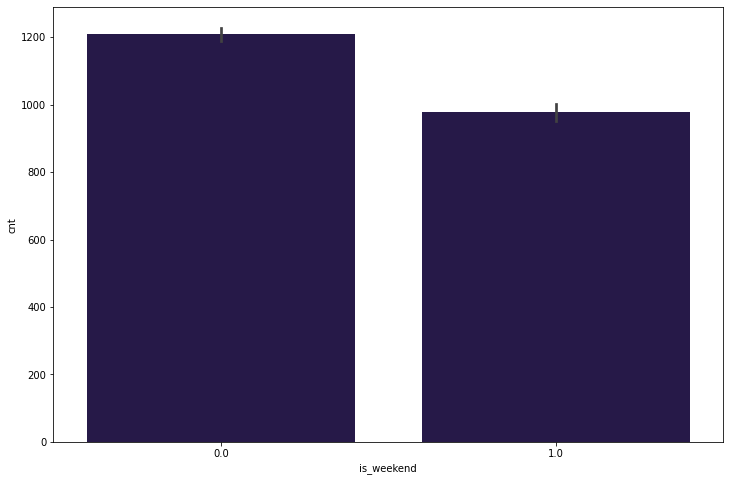

In [20]:
# Day and Count
plt.figure(figsize=(12,8))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x='is_weekend', y='cnt', data=bikes, color=color_palette);

Most bikes are used on the weekdays

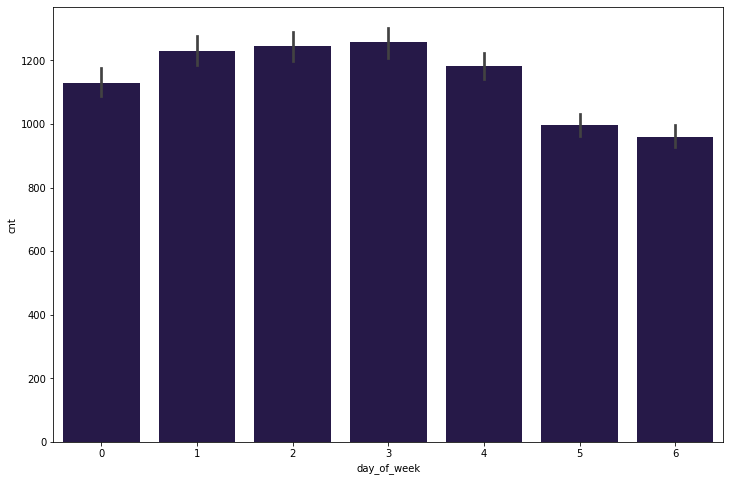

In [21]:
# Which day specifically
# Day and Count
plt.figure(figsize=(12,8))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x='day_of_week', y='cnt', data=bikes, color=color_palette);

Thursday has most usage of bikes

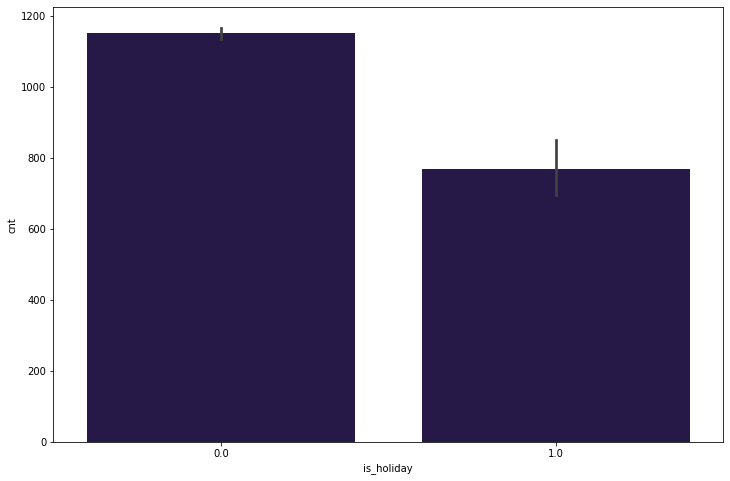

In [22]:
# Day and Count
plt.figure(figsize=(12,8))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x='is_holiday', y='cnt', data=bikes, color=color_palette);

People ride off holidays

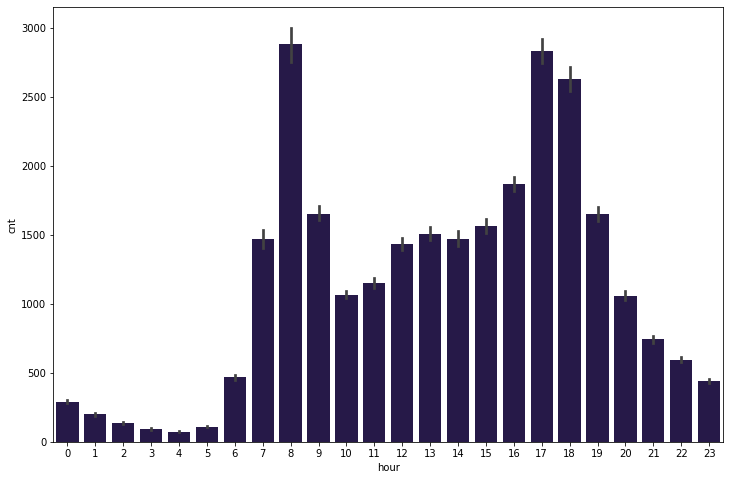

In [23]:
# Day and Count
plt.figure(figsize=(12,8))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x='hour', y='cnt', data=bikes, color=color_palette);

Peak usage of bikes during the peak hours.

**Summary**

Most people ride bikes during weekdays, with Thursday having the highest number of usage. Bikes are mostly used during the peak hours suggesting that most people use the bikes to go to work.

# Modelling

In [24]:
# Split our data
X = bikes.drop(['cnt', 'timestamp'], axis=1)
y = bikes['cnt']

X_train, X_temp, y_train, y_temp = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=7) 

X_val, X_test, y_val, y_test = train_test_split(X_temp,
                                                y_temp,
                                                train_size=0.5,
                                                random_state=7) 


In [25]:
# Instantiate models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()
xgb = XGBRegressor()

models = [linear_regression, decision_tree, random_forest, gradient_boosting, xgb]

In [26]:
for model in models:
  # Fit our model
  model.fit(X_train, y_train)

  # Evaluate model
  predictions = model.predict(X_val)
  mae = metrics.mean_absolute_error(y_val, predictions)
  rmse = metrics.mean_squared_error(y_val, predictions, squared=False)
  print(f'The {model} model has a mean absolute error of {mae} and a root mean squared error of {rmse}')


The LinearRegression() model has a mean absolute error of 680.2393200773787 and a root mean squared error of 934.5499291170063
The DecisionTreeRegressor() model has a mean absolute error of 185.3802412406663 and a root mean squared error of 337.51196715439534
The RandomForestRegressor() model has a mean absolute error of 138.1425960176144 and a root mean squared error of 257.71814077791333
The GradientBoostingRegressor() model has a mean absolute error of 254.76080942161803 and a root mean squared error of 386.2529495118822
The XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1

In [27]:
predictions = random_forest.predict(X_test)
mae = metrics.mean_absolute_error(y_test, predictions)
rmse = metrics.mean_squared_error(y_test, predictions, squared=False)
print(f'The {model} model has a mean absolute error of {mae} and a root mean squared error of {rmse}')

The XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) model has a mean absolute error of 123.70726846536549 and a root mean squared error of 230.84991569653337


In [28]:
joblib.dump(random_forest, 'best_model.pkl')

['best_model.pkl']